**Artificial Neural Networks(ANN) are part of supervised**
**machine learning where we will be having input as well as** **corresponding output present in our dataset. Our whole aim** **is to figure out a way of mapping this input to the respective output. ANN can be used for solving both** **regression and classification problems.**

**we will be developing an ANN for solving the classification class of problems.**

# **Understanding the Problem Statement for Artificial Neural Network**

Here we are dealing with a dataset from the finance domain. We have a dataset where we are having 14 dimensions in total and 100000 records. The dimensions that we will be dealing with are as follows:-

1.RowNumber:- Represents the number of rows
2.CustomerId:- Represents customerId
3.Surname:- Represents surname of the customer
4.CreditScore:- Represents credit score of the customer
5.Geography:- Represents the city to which customers belongs to
6.Gender:- Represents Gender of the customer
7.Age:- Represents age of the customer
8.Tenure:- Represents tenure of the customer with a bank
9.Balance:- Represents balance hold by the customer
10.NumOfProducts:- Represents the number of bank services used by the customer
11.HasCrCard:- Represents if a customer has a credit card or not
12.IsActiveMember:- Represents if a customer is an active member or not
13.EstimatedSalary:- Represents estimated salary of the customer
14.Exited:- Represents if a customer is going to exit the bank or not.

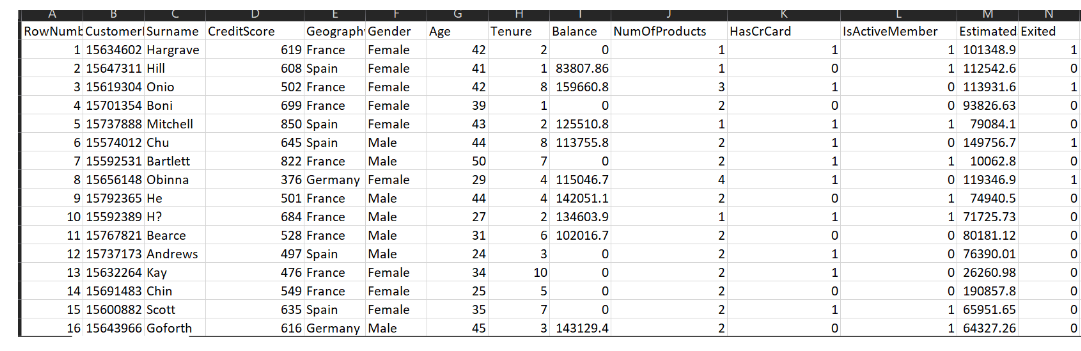

**As we can see from the above data dictionary, we are dealing with a total of 14 dimensions.**

Here our main goal is to create an **artificial neural network** that will take into consideration all independent variables(first 13) and based on that will predict if our customer is going to exit the bank or not(Exited is dependent variable here).


**Importing Necessary Libraries for Artificial Neural Network**

In [17]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

**Importing Dataset**

In this step, we are going to import our dataset. Since our dataset is in csv format, we are going to use the read_csv() method of pandas in order to load the dataset.

In [18]:
#Loading Dataset
data = pd.read_csv("/content/Churn_Modelling.csv")

In [19]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**Generating Matrix of Features (X)**


The basic principle while creating a machine learning model is to generate X also called as Matrix of Features. This X basically contains all our independent variables. Let’s create the same here.

Here I have used iloc method of Pandas data frame which allows us to fetch the desired values from the desired column within the dataset. Here as we can see that we are fetching all the data from the 3rd column till the last minus one column. The reason for that is the first 3 columns i.e RowNumber, CustomerId, and Surname have nothing to do with deciding whether the customer is going to exit or not. Hence in this case we started fetching all the values from the 3rd column onwards. Lastly, since our last column is basically a dependent variable hence we have mentioned -1 in iloc method using which allows us to exclude the last column from being included in our matrix of features X.

In [20]:
X = data.iloc[:,3:-1]
print(X)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           

**Generating Dependent Variable Vector(Y)**

In the same fashion where we have created our matrix of features(X) for the independent variable, we also have to create a dependent variable vector(Y) which will only contain our dependent variable values.

In [21]:
#Generating Dependent Variable Vectors
Y = data.iloc[:,-1]
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [22]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [23]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [24]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [25]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [26]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,False,True,False
9275,427,42,1,75681.52,1,1,1,57098.00,True,False,True
2995,535,29,2,112367.34,1,1,0,185630.76,False,False,False
5316,654,40,5,105683.63,1,1,0,173617.09,False,True,True
356,850,57,8,126776.30,2,1,1,132298.49,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,True,False,False
4859,794,22,4,114440.24,1,1,1,107753.07,False,True,False
3264,738,35,5,161274.05,2,1,0,181429.87,False,False,True
9845,590,38,9,0.00,2,1,1,148750.16,False,True,False


In [27]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9394,597,35,8,131101.04,1,1,1,192852.67,True,False,False
898,523,40,2,102967.41,1,1,0,128702.10,False,False,False
2398,706,42,8,95386.82,1,1,1,75732.25,False,True,False
5906,788,32,4,112079.58,1,0,0,89368.59,False,False,True
2343,706,38,5,163034.82,2,1,1,135662.17,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1037,625,24,1,0.00,2,1,1,180969.55,False,False,False
2899,586,35,7,0.00,2,1,0,70760.69,False,False,False
9549,578,36,1,157267.95,2,1,0,141533.19,False,True,True
2740,650,34,4,142393.11,1,1,1,11276.48,True,False,True


In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


**Now let's make the ANN!**

In [29]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense



In [30]:

# Initialising the ANN
classifier = Sequential()

**What is the difference between he and glorot initialization?
Glorot initialization is recommended for tanh- and sigmoid-based neurons, and he  initialization is recommended for ReLU-based neurons.**

In [31]:
# Adding the input layer and the first hidden layer
#Initializers define the way to set the initial random weights of Keras layers.
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
#11*6+6=72
#6*6+6=42
#6*1+1=7
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units= 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [32]:

# Compiling the ANN
#Computes the cross-entropy loss between true labels and predicted labels.
#Use this cross-entropy loss for binary (0 or 1) classification applications.
#Calculates how often predictions equal labels.

classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10,  epochs = 100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5626 - accuracy: 0.7492 - val_loss: 0.4737 - val_accuracy: 0.7944
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4554 - accuracy: 0.7949 - val_loss: 0.4440 - val_accuracy: 0.7944
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4306 - accuracy: 0.8020 - val_loss: 0.4241 - val_accuracy: 0.8171
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4110 - accuracy: 0.8214 - val_loss: 0.4091 - val_accuracy: 0.8243
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3934 - accuracy: 0.8347 - val_loss: 0.3968 - val_accuracy: 0.8315
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3796 - accuracy: 0.8390 - val_loss: 0.3869 - val_accuracy: 0.8391
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3694 - accuracy: 0.8459 - val_loss: 0.3806 - val_accuracy: 0.8436

In [34]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 72        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Making the predictions and evaluating the model**

In [35]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

y_pred

63/63 [==============================] - 0s 1ms/step


array([[0.38631627],
       [0.29320776],
       [0.14652118],
       ...,
       [0.10985133],
       [0.16211769],
       [0.20939519]], dtype=float32)

In [36]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.3)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [37]:
#credit score,age,tenure,balance, num products,hascard,is active member,estimated salary,germany,spain,male

In [38]:
output=classifier.predict(sc.transform([[120, 35, 2, 500000, 1, 1, 1, 100000, 0, 0, 1]]))

1/1 [==============================] - 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [39]:
output

array([[0.0986795]], dtype=float32)

In [40]:
[1 if y > 0.3 else 0 for y in output]

[0]

In [41]:
output=classifier.predict(sc.transform([[120, 35, 2, 0, 1, 1, 1, 100, 0, 0, 1]]))

1/1 [==============================] - 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
output

array([[0.29380566]], dtype=float32)

In [43]:
[1 if y > 0.3 else 0 for y in output]

[0]

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1378,  217],
       [ 140,  265]])

In [45]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8215

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


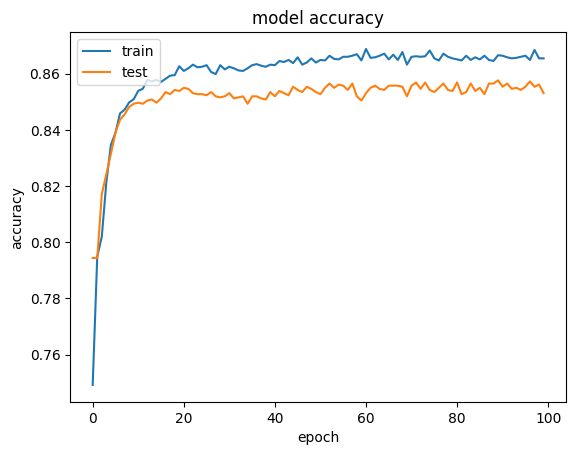

In [46]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

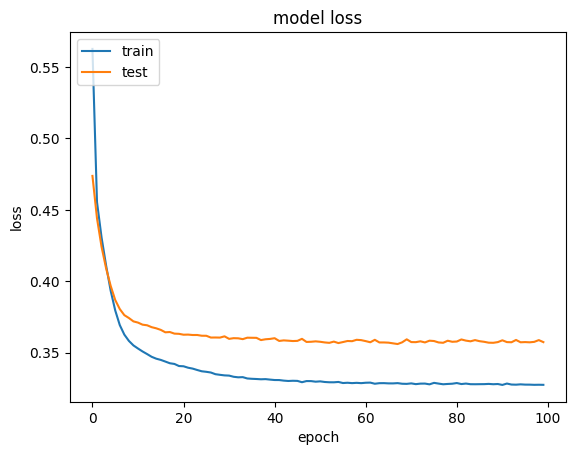

In [47]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
classifier.save("ANN.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
#how to load model
from tensorflow import keras
model = keras.models.load_model('/content/ANN.h5')

 **Inference code**

In [50]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from tensorflow import keras
model = keras.models.load_model('/content/ANN.h5')
print("Model Loaded>>>>>>>>>>>>>>>>")
def exit_predication(credit_score,age,tenure,balance, num_products,hascard,is_active_member,estimated_salary,germany,spain,male):
    pred=model.predict(sc.fit_transform([[credit_score,age,tenure,balance, num_products,hascard,is_active_member,estimated_salary,germany,spain,male]]))
    output=[1 if y > 0.3 else 0 for y in pred]
    print("%%%%%%%",output)
    if output==1:
        print("Customer exit the bank")
    else:
        print("Customer won't exit the bank")
exit_predication(120, 35, 2, 500000, 1, 1, 1, 100000, 0, 0, 1)

Model Loaded>>>>>>>>>>>>>>>>
1/1 [==============================] - 0s 83ms/step
%%%%%%% [0]
Customer won't exit the bank
